# Working with APIs

**API** -  Application Programming Interface
A set of rules to allow an application to request data from another system without having direct access to their database


### API Request Example

Google Map
https://maps.googleapis.com/maps/api/timezone/json?location=39.6034810,-119.6822510&timestamp=1331161200&key=YOUR_API_KEY 


Census Data
https://api.census.gov/data/2010/dec/sf1?get=H001001,NAME&for=state:*&key=[userkey]


### API Structure

https://api.census.gov/data/2010/dec/sf1?get=H001001,NAME&for=state:*&key=[userkey]


1. Base URL
  * Host https://api.census.gov/data 
  * Year 2010
  * Dataset dec/sf1
2. Parameters (after the ?)
  * Query string
  * Get a list of variables
  * For- geography of interest
3. Response from the server
4. JSON format


#### JSON (Java Script Object Notation) to describe data
* Java Script Object Notation (JSON)
* Curly Bracket ‘{ }’ – start/end
* Square Bracket ‘[ ]’ – start/end an element or array
* Comma ‘,’ – field separator
* Colon ‘:’ – key value separator


## Example : OPEN LIBRARY API




https://openlibrary.org/

https://openlibrary.org/developers

https://openlibrary.org/developers/api

https://openlibrary.org/dev/docs/api/subjects


Try this - 

http://openlibrary.org/subjects/love.json

And this

http://openlibrary.org/subjects/love.json?published_in=1500-1600 

**Formatting**

Json data can be formatted so that it is easy to read and understand.

You can achieve this using the extension - JSON Parser Json formatter

https://chrome.google.com/webstore/detail/json-formatter/bcjindcccaagfpapjjmafapmmgkkhgoa?hl=en

After adding the extension, try this, 

http://openlibrary.org/subjects/love.json?published_in=1500-1600  






In [ ]:
# Use requests to get the Api data
import requests
import json 

url="http://openlibrary.org/subjects/love.json"

response = requests.get(url)
print(response.status_code)

# status code 200 means OK, what about 404?


200


In [ ]:
# check the type of the returned data

data = json.loads(response.text)
print(type(data))
print(type(response.text))

<class 'dict'>
<class 'str'>


In [ ]:
# print the json data returned

print(json.dumps(data, indent=5))

#### Json data exploration of the above output

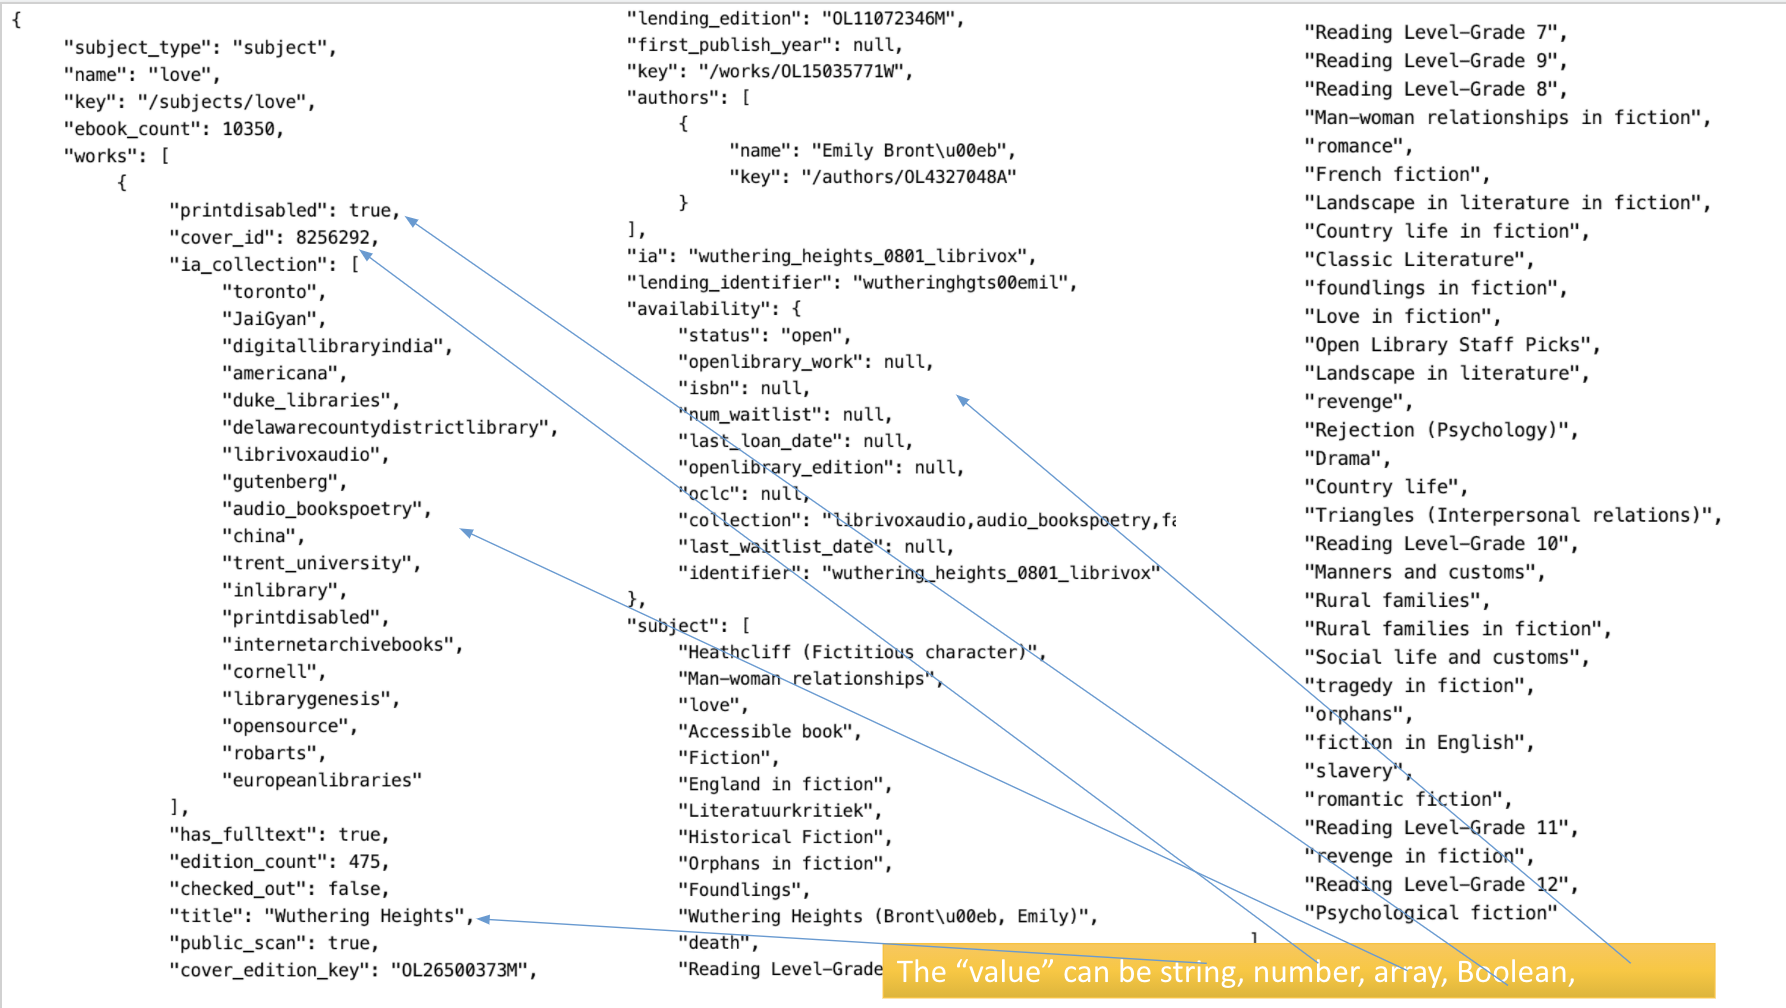


##### Array and objects


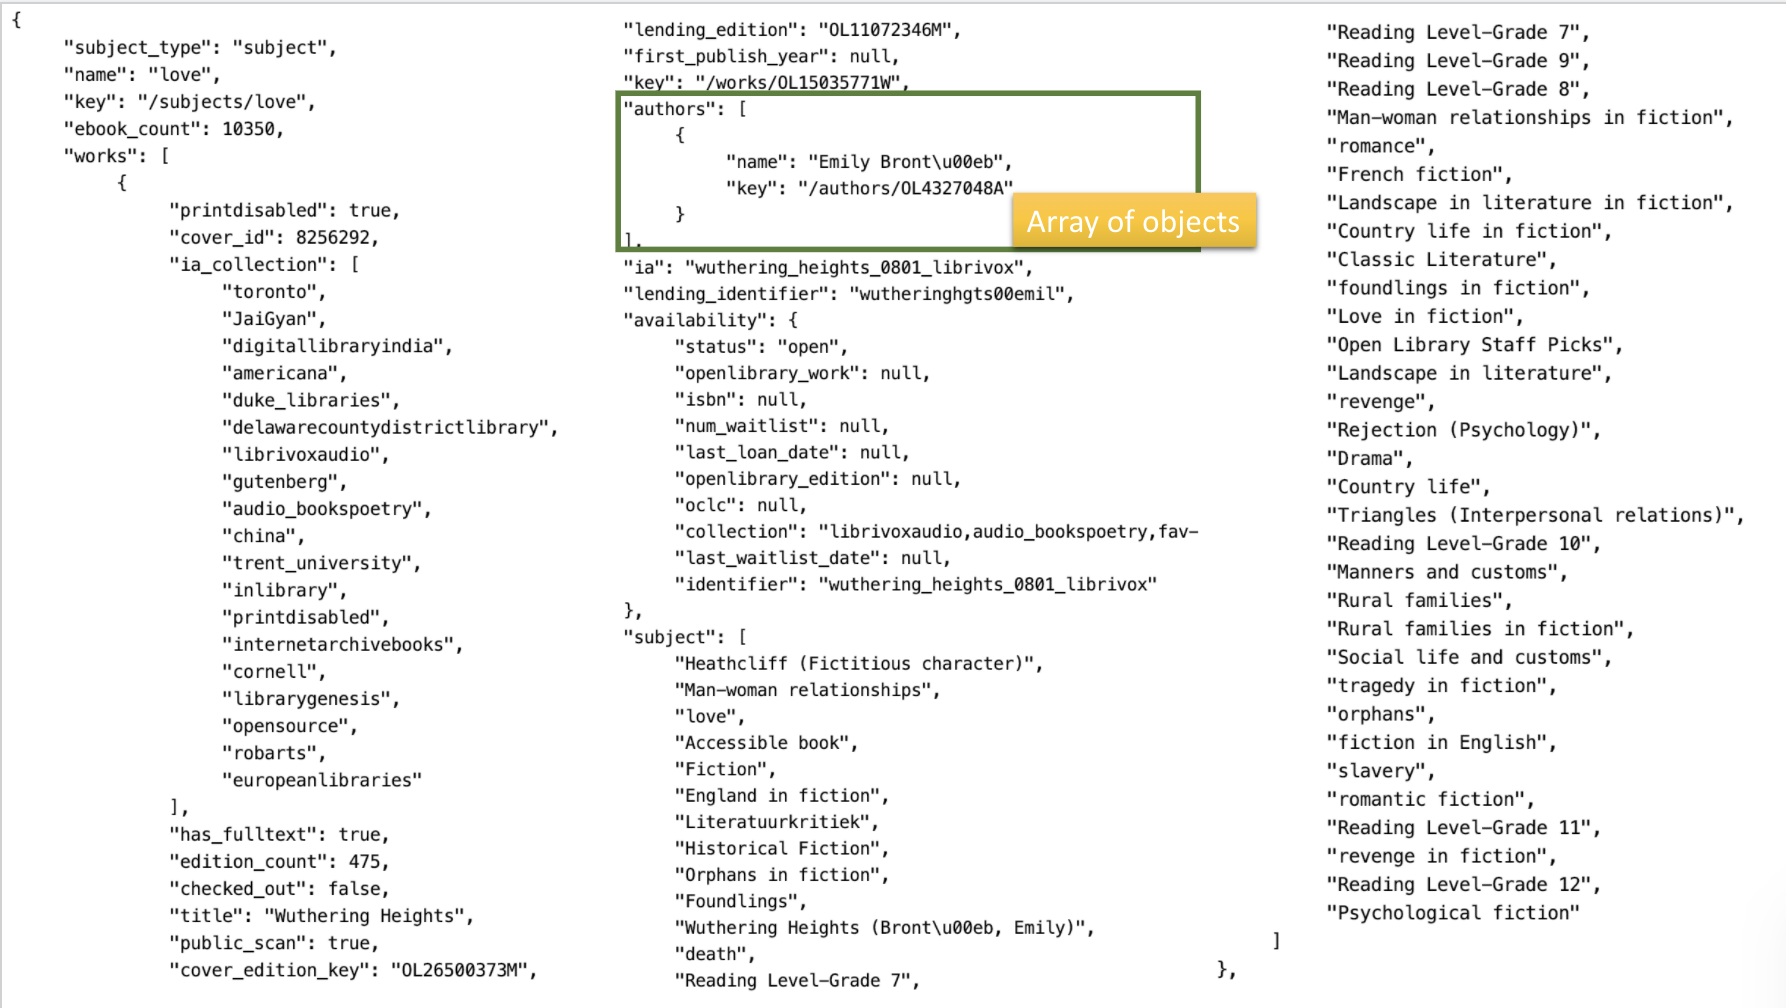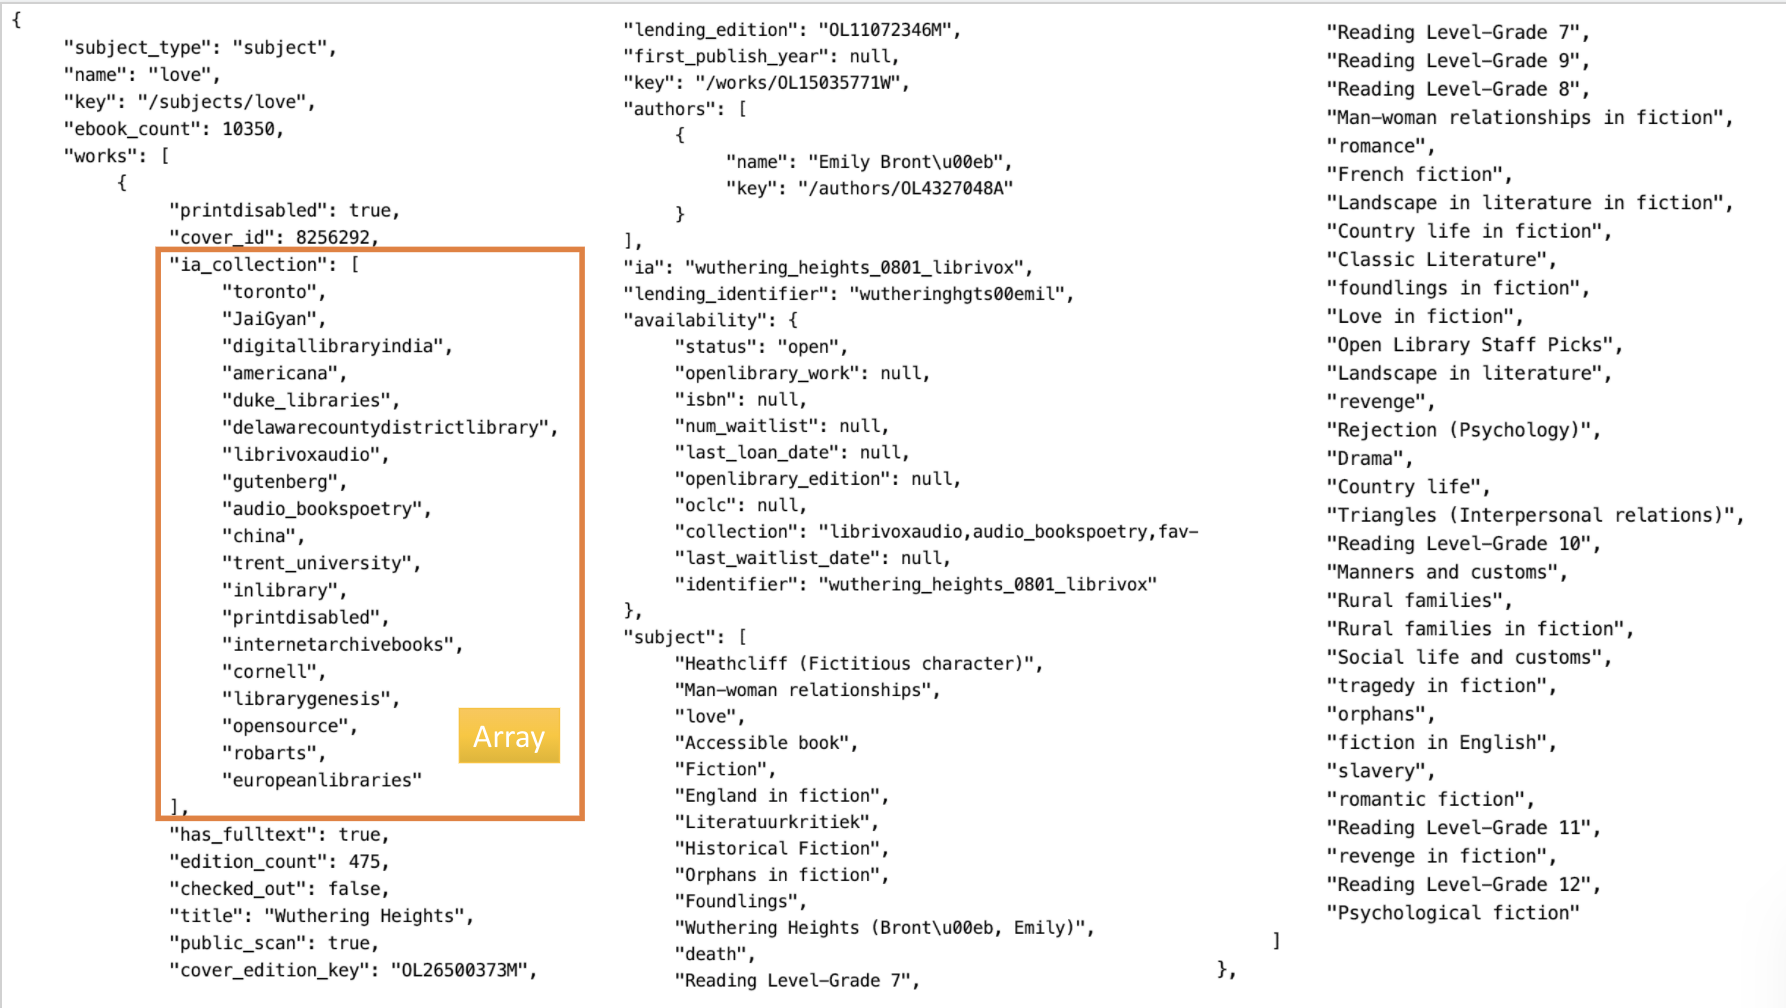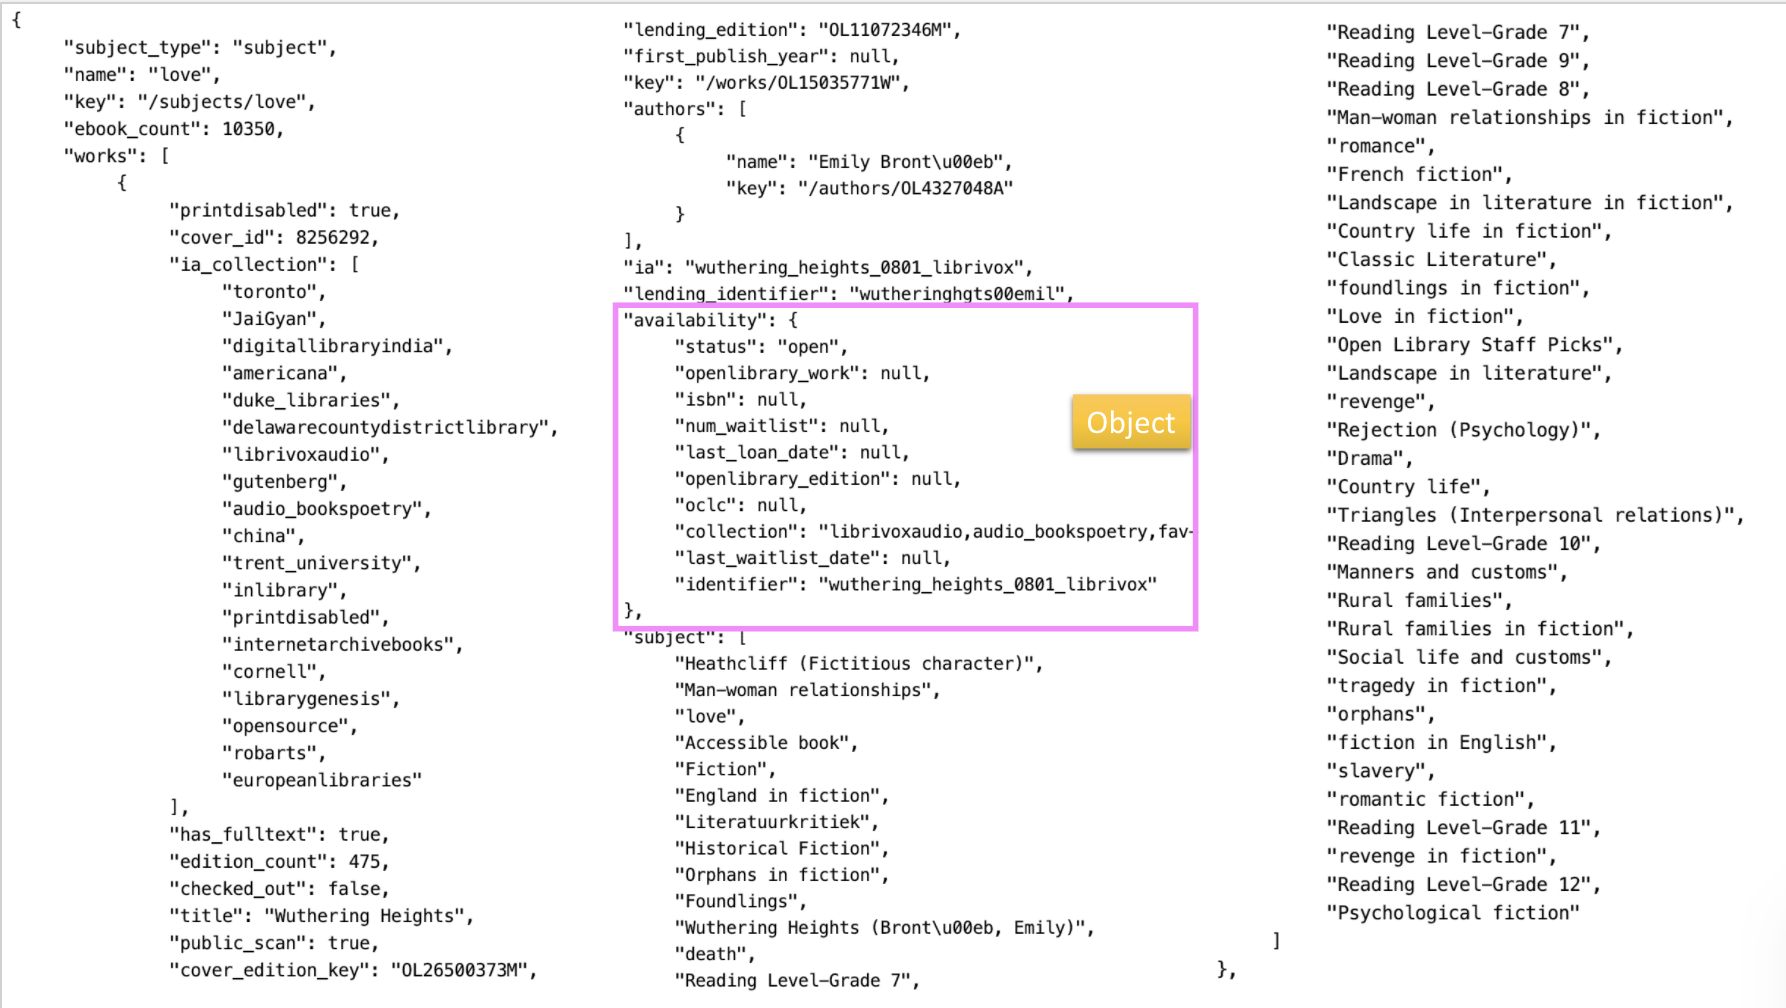

#### Converting data to a dataframe

* **Json_normalize** is used to convert the json string to 
a pandas dataframe

* **Sep** is the separator for nesting


In [ ]:
import pandas as pd

loveBooks = pd.json_normalize(data['works'], sep="_")

# Display the number of non-null samples and feature types
print(loveBooks.info())

# Display the first 5 rows.
print(loveBooks.head())


* **Record_path** is the path to each record that you want to 
get to. E.g. list authors.

* **Meta** is the fields that you want to select for the dataframe


In [ ]:
authors = pd.json_normalize(data['works'], sep="_", record_path="authors", meta=["title", "edition_count", "cover_id"])
print(authors.head(3))

                   key            name  ... edition_count cover_id
0  /authors/OL4327048A    Emily Brontë  ...           481  8484760
1   /authors/OL189658A           Plato  ...           252  8236248
2    /authors/OL39281A  Edmond Rostand  ...           198  8236320

[3 rows x 5 columns]


#### Excercise
Create a Open Library Adventure Books API:
URL: http://www.openlibrary.org/subjects/adventure.json

Process to generate the API Key:
1. Import requests python module and use the URL and open the API and store it in the response. Display the status code of the created response.

2. Load text from the above response into a string. Pretty print the loaded text with indent = 5.
3. Extract the “works” column data from the loaded text and create a dataframe named “adventures” normalize the data using delimiter: “_”.

4. How many Adventure books are there?

5. Print Title, Author and Subject of books who has "open" availability status

6. Display name of the book with highest edition count and its corresponding cover edition key.

In [ ]:
import requests
import json
import pandas as pd

# Type your solutions here
#1. Import requests python module and use the URL and open the API and store it in the response. Display the status code of the created response.
pd.set_option('display.max_columns', None)
url="http://www.openlibrary.org/subjects/adventure.json"
response = requests.get(url)
#2. Load text from the above response into a string. Pretty print the loaded text with indent = 5.
data = response.json()
#3. Extract the “works” column data from the loaded text and create a dataframe named “adventures” normalize the data using delimiter: “_”.
adventures = pd.json_normalize(data["works"],sep="_")
#4. How many Adventure books are there?
print(len(adventures.title.unique()))
#5. Print Title, Author and Subject of books who has "open" availability status
print(adventures[adventures["availability_status"]=="open"][["title","authors","subject"]])
#6. Display name of the book with highest edition count and its corresponding cover edition key.
print(adventures[adventures["edition_count"]==max(adventures["edition_count"])][["title","cover_edition_key"]])

12
                          title  \
0                         Iliad   
1  The Adventures of Tom Sawyer   
2            Gulliver's Travels   
3        The Return of the King   
7                           She   
8                  The Talisman   

                                             authors  \
0  [{'key': '/authors/OL6848355A', 'name': 'Homer'}]   
1  [{'key': '/authors/OL18319A', 'name': 'Mark Tw...   
2  [{'key': '/authors/OL24522A', 'name': 'Jonatha...   
3  [{'key': '/authors/OL26320A', 'name': 'J.R.R. ...   
7  [{'key': '/authors/OL23326A', 'name': 'H. Ride...   
8  [{'key': '/authors/OL75235A', 'name': 'Sir Wal...   

                                             subject  
0  [Trojan War. fast (OCoLC)fst01157294, Miami Un...  
1  [The Adventures of Tom Sawyer, Mark Twain, 183...  
2  [Swedish, German, Story, Histoire, Humor, Exam...  
3  [Elves, Hobbits, The Lord of the Rings, hope, ...  
7  [Fiction in English, Fiction, fantasy, general...  
8  [Story, Catholicism, Acce

## NASA API

### API KEYS

Some websites like to control who/what/how when the data is being accessed via APIs

For this purpose API keys are issued to users (or even other programs).
The API key is used to limit what users can do, as well as track the usage.

Eg: Nasa API - https://api.nasa.gov/


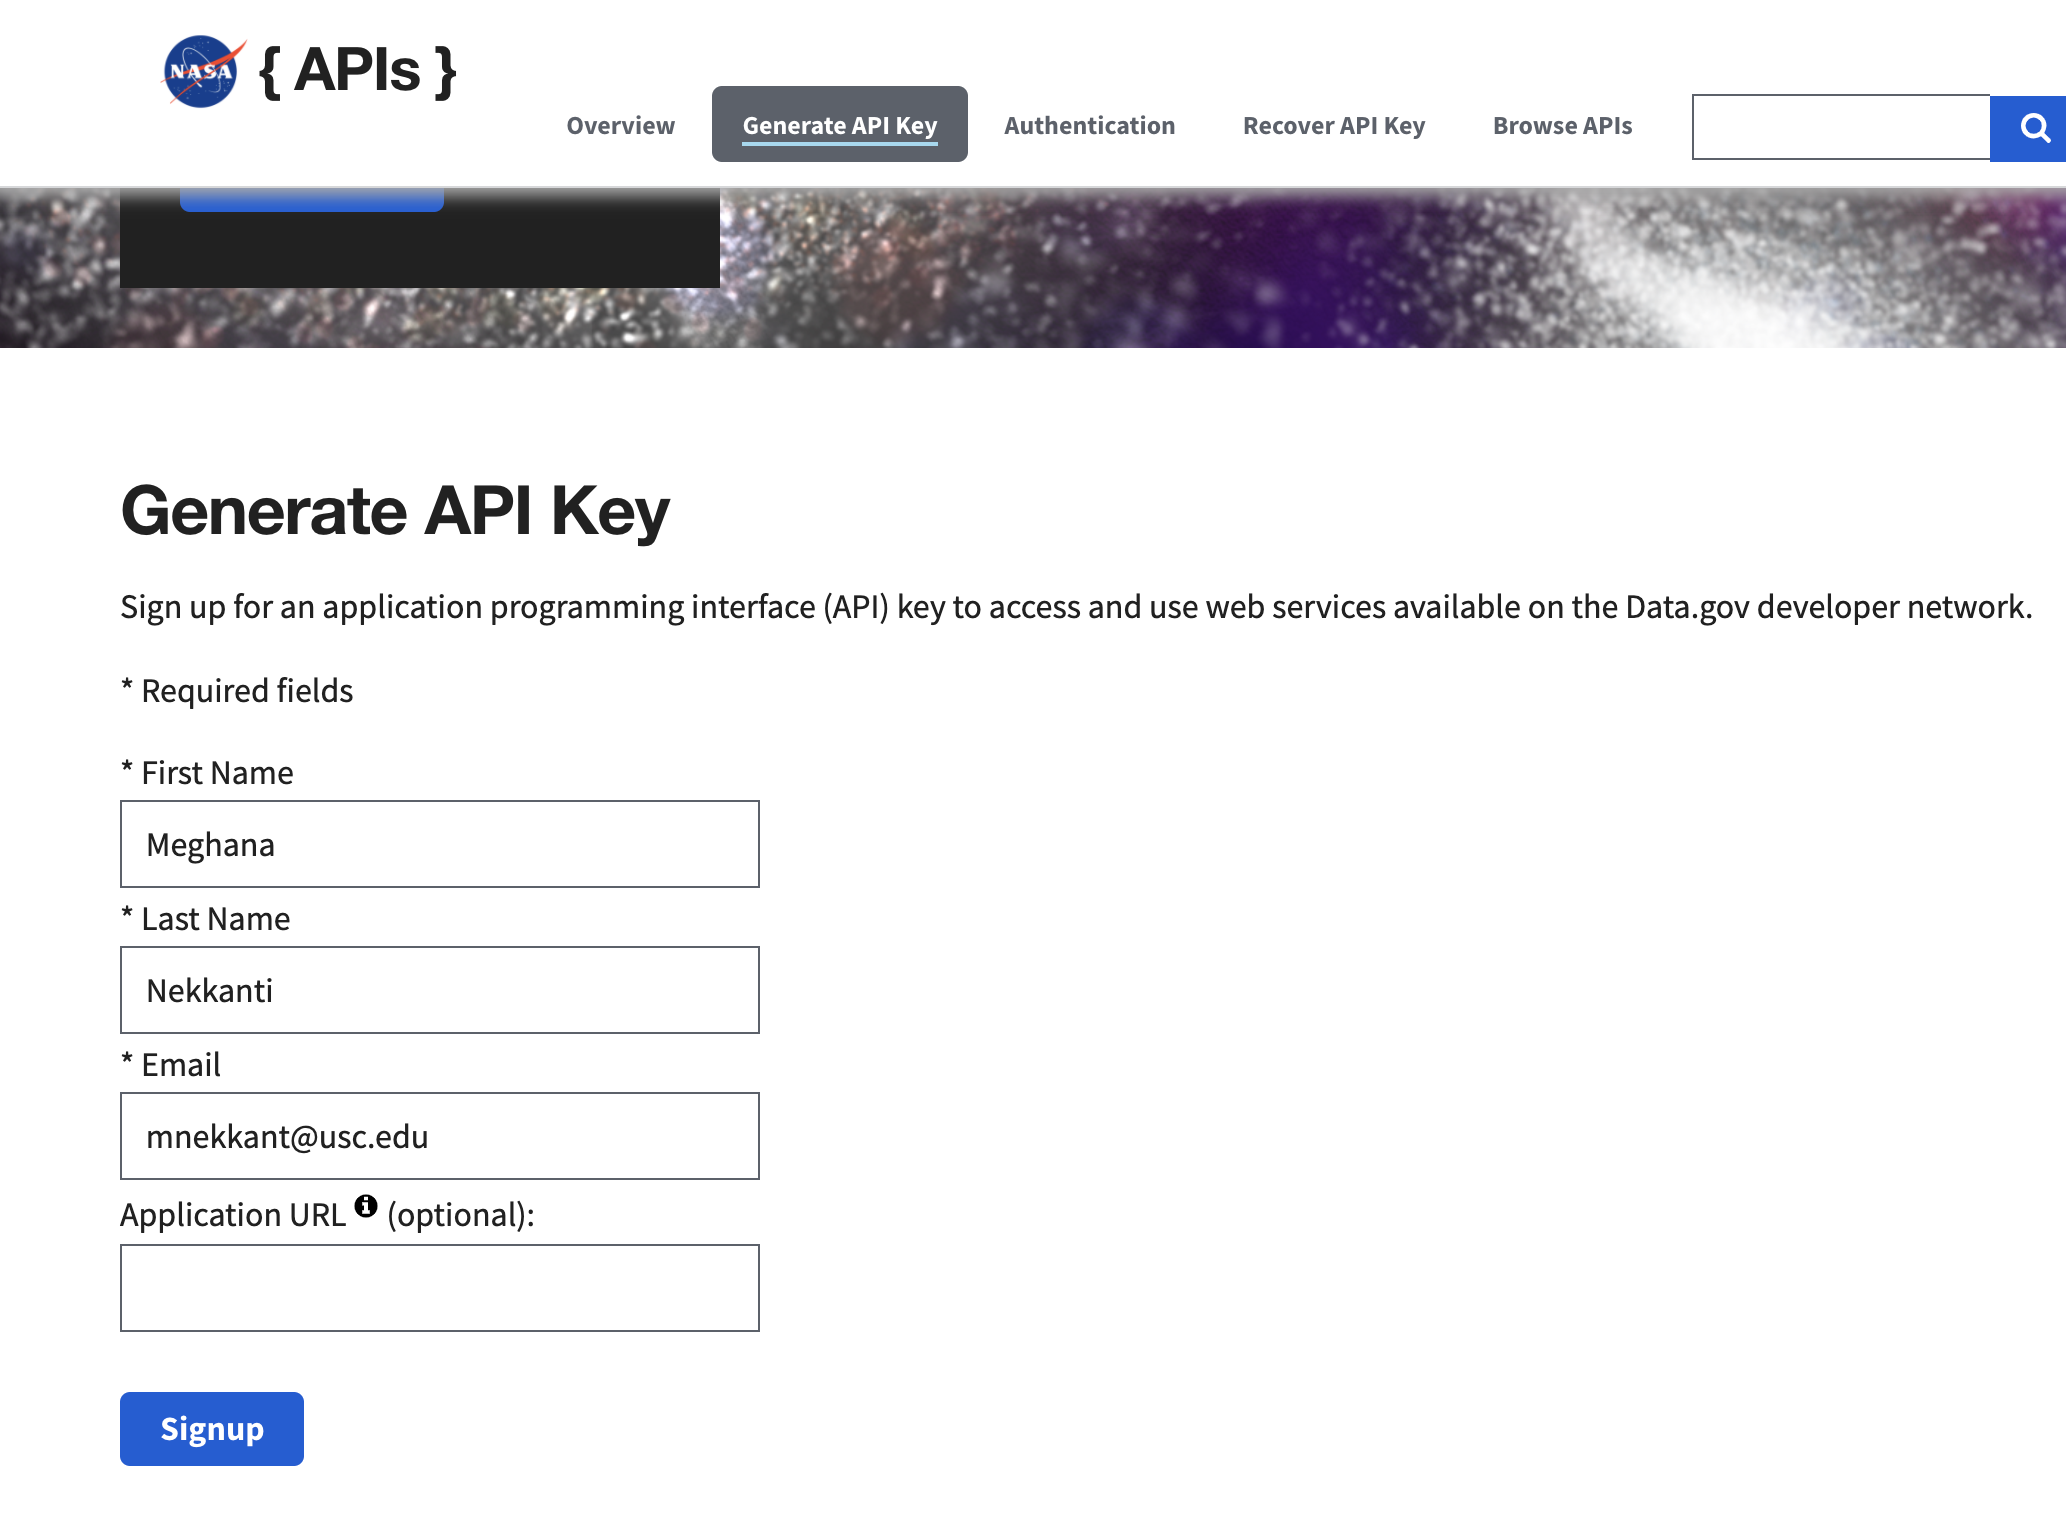

**Follow the below steps to generate Api key and use that for data exploration :**
1.   Visit https://api.nasa.gov/
2.   Enter First Name, Last Name and email ID to Generate the API KEY
3.   Click Signup and you will be given the API key. (Refer to the image below)


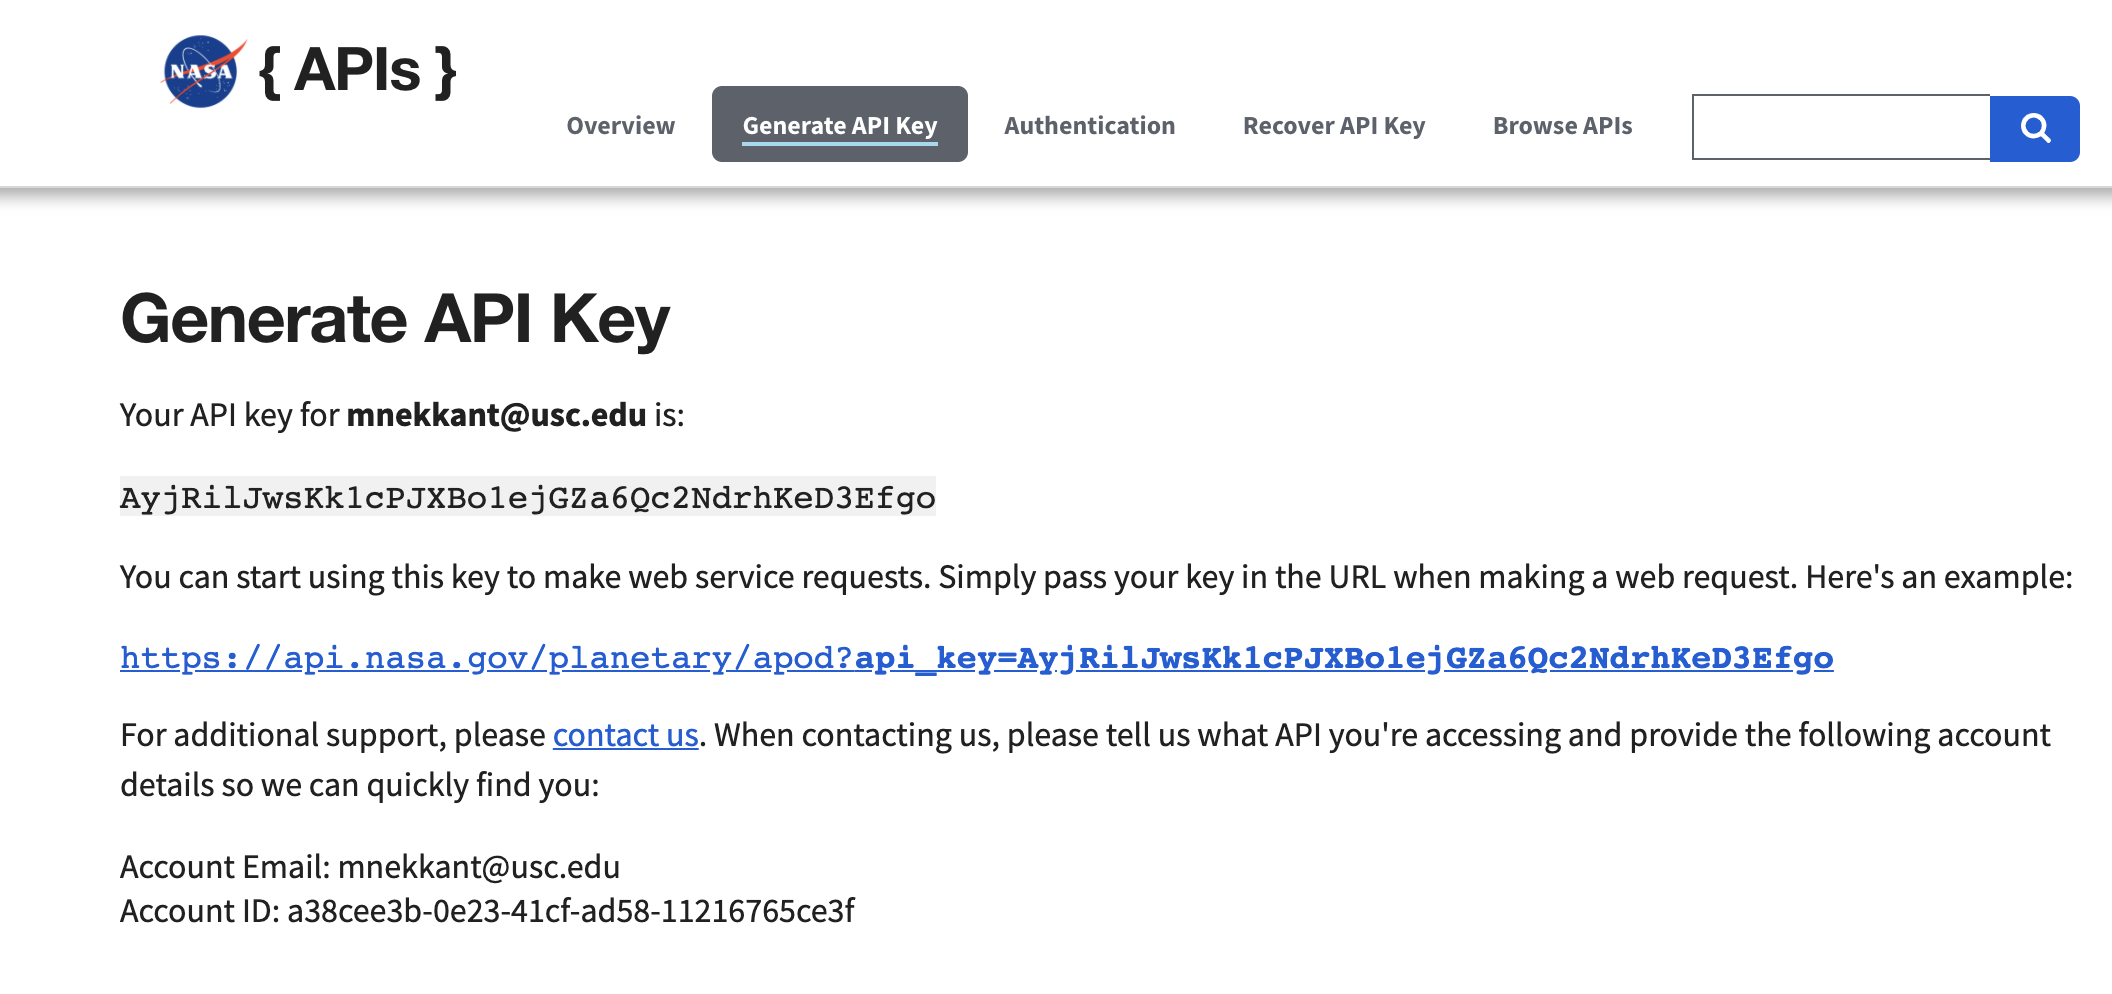

**Go to Browse APIs section and you can find various data to explore.** 

Let's choose **Epic API** for our example.  
More information about the API - https://epic.gsfc.nasa.gov/about/api





---



---




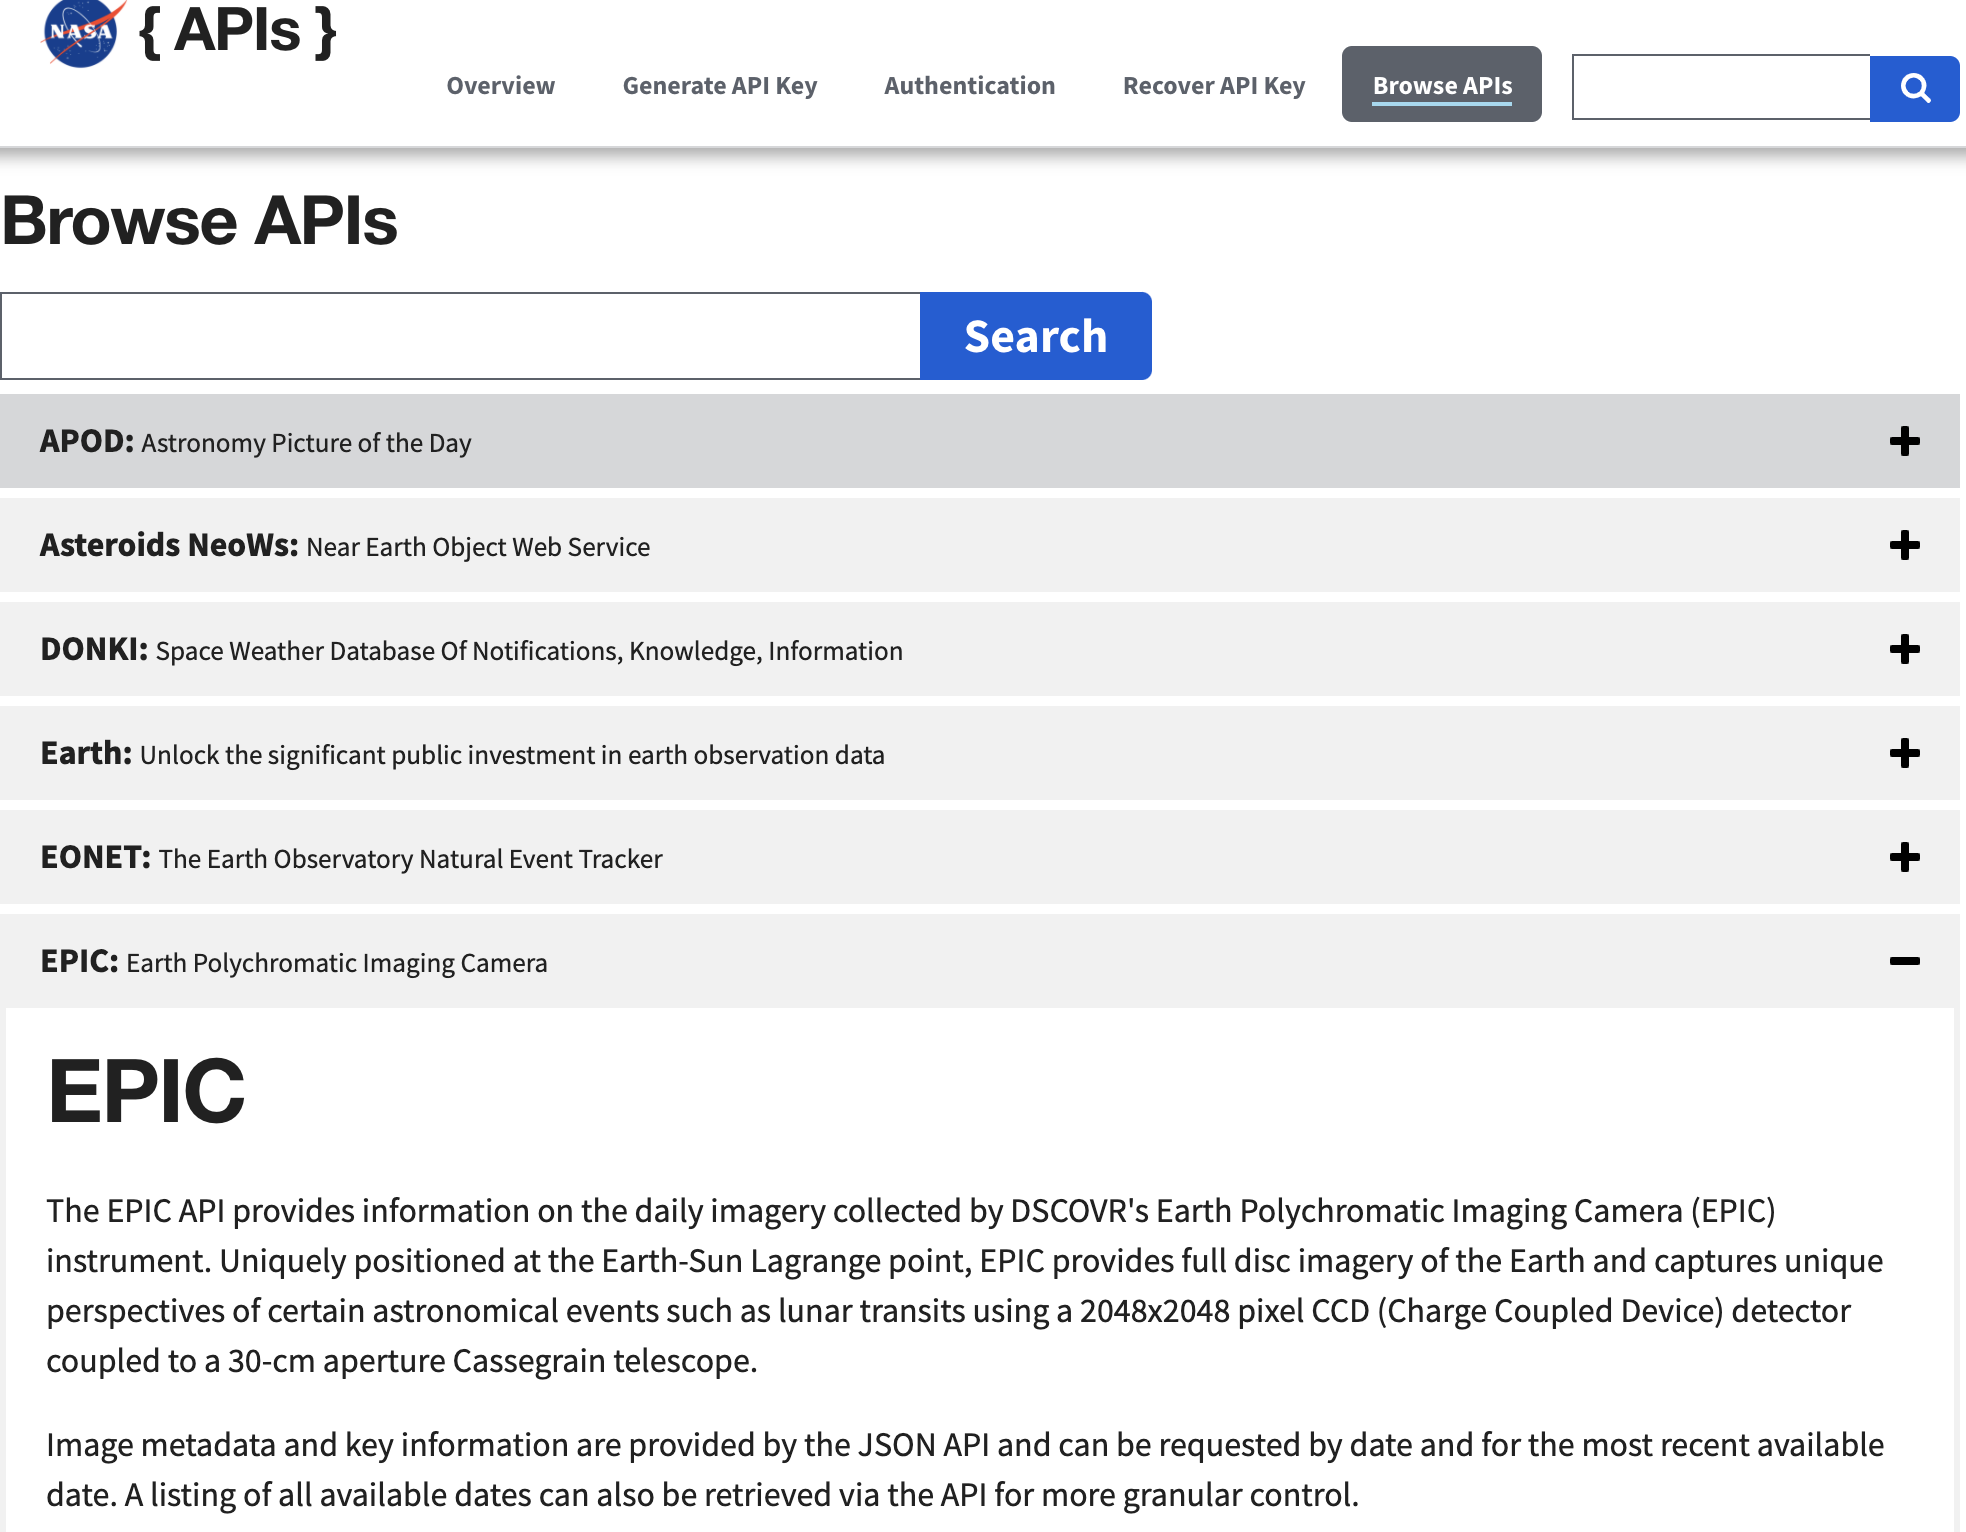

In [ ]:
# Using API key

pd.set_option("display.max_columns", True)
apiKey = "?api_key=AyjRilJwsKk1cPJXBo1ejGZa6Qc2NdrhKeD3Efgo"
url = "https://api.nasa.gov/EPIC/api/natural/date/2021-02-16"

response = requests.get(url+apiKey)
print(response.status_code)
data = response.json()
print(data)
print(json.dumps(data, indent=4))


Try to run the above program without API key and check the response.



In [ ]:
# Let's check the output without API Key in code

pd.set_option("display.max_columns", True)
url = "https://api.nasa.gov/EPIC/api/natural/date/2021-02-16"

response = requests.get(url)
print(response.status_code)
data = response.json()
print(data)
print(json.dumps(data, indent=4))



403
{'error': {'code': 'API_KEY_MISSING', 'message': 'No api_key was supplied. Get one at https://api.nasa.gov:443'}}
{
    "error": {
        "code": "API_KEY_MISSING",
        "message": "No api_key was supplied. Get one at https://api.nasa.gov:443"
    }
}


Also try this in a browser without API KEY,  https://api.nasa.gov/EPIC/api/natural/date/2021-02-16

Then try this with key, https://api.nasa.gov/EPIC/api/natural/date/2021-02-16?api_key=AyjRilJwsKk1cPJXBo1ejGZa6Qc2NdrhKeD3Efgo


## EXAMPLE

NASA Mars Rover API.

Connect to the NASA Mars Rover API

URL: https://api.nasa.gov/mars-photos/api/v1/rovers/curiosity/photos?sol=1000&amp;api_key=

Key: Use your own API Key generated above.

Make a get request to the API and store the response.

In [ ]:
import requests
import json
import pandas as pd

apiKey = "AyjRilJwsKk1cPJXBo1ejGZa6Qc2NdrhKeD3Efgo"

# Making a get request to the API and store the response.
url = "https://api.nasa.gov/mars-photos/api/v1/rovers/curiosity/photos?sol=1000&api_key="
response = requests.get(url+apiKey)

# Displaying the status code of the response
print(response.status_code)

# Storing the response with JSON encoding. 
data = response.json()

# Printing the JSON encoded data with indent = 5.
print(json.dumps(data, indent=5))

# Extracting the “photos” column data from the loaded text(data)
marsRover = pd.json_normalize(data["photos"], sep="_")
print(marsRover.shape)


**Below code shows some data exploration and how to answer the questions using the API data**



In [ ]:
# Full name of the camera's used in the marsRover
print(marsRover.camera_full_name.unique())


['Front Hazard Avoidance Camera' 'Rear Hazard Avoidance Camera'
 'Mast Camera' 'Chemistry and Camera Complex' 'Navigation Camera']


In [ ]:
# Name(s) of the rover unit(s) that were present

print(marsRover.rover_name.unique())

['Curiosity']


In [ ]:
# Number of days elapsed between the rover launch date(s) and landing date(s)

from datetime import datetime

dateFormat = '%Y-%m-%d'
launch = datetime.strptime(marsRover.rover_launch_date.unique()[0],
                                    dateFormat)
landing = datetime.strptime(marsRover.rover_landing_date.unique()[0],
                                    dateFormat)
print(landing - launch)

254 days, 0:00:00
